In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pyreadr
import censusdata
import bokeh
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import CustomJS
from bokeh.models import LinearColorMapper
from bokeh.models.tools import HoverTool
from bokeh.models import Dropdown
output_notebook()

Loading BokehJS ...

#### Read in presidential data

In [2]:
result = pyreadr.read_r('data/dataverse_shareable_presidential_county_returns_1868_2020.Rdata')
pres_df = result['pres_elections_release']
pres_df['dem_twoway_pres'] = pres_df.democratic_raw_votes / pres_df.pres_raw_county_vote_totals_two_party

print(pres_df.shape)
pres_df.head()

(113756, 21)


,election_year,fips,county_name,state,sfips,office,election_type,seat_status,democratic_raw_votes,dem_nominee,...,rep_nominee,pres_raw_county_vote_totals_two_party,raw_county_vote_totals,county_first_date,county_end_date,state_admission_date,complete_county_cases,original_county_name,original_name_end_date,dem_twoway_pres
0,1868.0,01001,AUTAUGA,AL,01,PRES,G,Open Seat,851.0,Horatio Seymour,...,Ulysses S. Grant,2356.0,2356.0,1818-11-21,None,1819-12-14,1.0,NaN,None,0.361205
1,1872.0,01001,AUTAUGA,AL,01,PRES,G,Republican President Re-election,669.0,Horace Greeley,...,Ulysses S. Grant,2262.0,2262.0,1818-11-21,None,1819-12-14,1.0,NaN,None,0.295756
2,1876.0,01001,AUTAUGA,AL,01,PRES,G,Open Seat,804.0,Samuel J. Tilden,...,Rutherford B. Hayes,2380.0,2380.0,1818-11-21,None,1819-12-14,1.0,NaN,None,0.337815
3,1880.0,01001,AUTAUGA,AL,01,PRES,G,Open Seat,978.0,Winfield Scott Hancock,...,James A. Garfield,1952.0,1967.0,1818-11-21,None,1819-12-14,1.0,NaN,None,0.501025
4,1884.0,01001,AUTAUGA,AL,01,PRES,G,Open Seat,911.0,Grover Cleveland,...,James G. Blaine,1788.0,1789.0,1818-11-21,None,1819-12-14,1.0,NaN,None,0.509508


In [3]:
pres_df.election_year.value_counts().reset_index().sort_values('index', ascending=False)

,index,election_year
9,2020.0,3113
10,2016.0,3113
8,2012.0,3114
6,2008.0,3114
5,2004.0,3114
7,2000.0,3114
4,1996.0,3114
1,1992.0,3115
0,1988.0,3115
2,1984.0,3115


#### Read in senate data

In [4]:
result = pyreadr.read_r('data/dataverse_shareable_us_senate_county_returns_1908_2020.Rdata')
sen_df = result['senate_elections_release']
sen_df['dem_twoway_sen'] = sen_df.democratic_raw_votes / sen_df.senate_raw_county_vote_totals_two_party

print(sen_df.shape)
sen_df.head()

(118687, 22)


,election_id,election_year,fips,seat_class,county_name,state,sfips,office,election_type,seat_status,...,republican_raw_votes,rep_nominee,senate_raw_county_vote_totals_two_party,raw_county_vote_totals,county_first_date,county_end_date,state_admission_date,original_county_name,original_name_end_date,dem_twoway_sen
0,1914 AL Class III,1914.0,01001,Class III,AUTAUGA,AL,1,SEN,G,Democratic open seat,...,15.0,Alex C. Birch,540.0,602.0,1818-11-21,None,1819-12-14,NaN,NaN,0.972222
1,1918 AL Class II,1918.0,01001,Class II,AUTAUGA,AL,1,SEN,G,Democratic Senator re-election,...,0.0,None,507.0,507.0,1818-11-21,None,1819-12-14,NaN,NaN,1.000000
2,1920 AL Class III,1920.0,01001,Class III,AUTAUGA,AL,1,SEN,G,Democratic Senator re-election,...,167.0,L.H. Reynolds,1124.0,1130.0,1818-11-21,None,1819-12-14,NaN,NaN,0.851423
3,1920 AL Class II,1920.0,01001,Class II,AUTAUGA,AL,1,SEN,S,Democratic open seat,...,143.0,C.P. Lunsford,1157.0,1164.0,1818-11-21,None,1819-12-14,NaN,NaN,0.876404
4,1924 AL Class II,1924.0,01001,Class II,AUTAUGA,AL,1,SEN,G,Democratic Senator re-election,...,101.0,F.H. Lathrop,947.0,947.0,1818-11-21,None,1819-12-14,NaN,NaN,0.893347


In [5]:
sen_df.election_year.value_counts().reset_index().sort_values('index', ascending=False)

,index,election_year
2,2020.0,2459
35,2018.0,2047
64,2017.0,67
27,2016.0,2059
6,2014.0,2415
...,...,...
45,1916.0,1936
44,1914.0,1962
54,1912.0,473
70,1910.0,15


In [6]:
election_year = 2020
merge_df_2020 = pd.merge(
    pres_df[pres_df.election_year == election_year][['election_year', 'fips', 'county_name', 'state', 'dem_twoway_pres']],
    sen_df[sen_df.election_year == election_year][['election_year', 'fips', 'dem_twoway_sen']],
    how='inner',
    on=['election_year', 'fips']
)
merge_df_2020 = merge_df_2020[(merge_df_2020.dem_twoway_sen < 1) & (merge_df_2020.dem_twoway_sen > 0)]
merge_df_2020['dem_twoway_pres_display'] = merge_df_2020.dem_twoway_pres.apply(lambda x: str(round(x*100, 1))+'%')
merge_df_2020['dem_twoway_sen_display'] = merge_df_2020.dem_twoway_sen.apply(lambda x: str(round(x*100, 1))+'%')

print(merge_df_2020.shape)
merge_df_2020.head()

(2384, 8)


,election_year,fips,county_name,state,dem_twoway_pres,dem_twoway_sen,dem_twoway_pres_display,dem_twoway_sen_display
0,2020.0,01001,AUTAUGA,AL,0.274423,0.299198,27.4%,29.9%
1,2020.0,01003,BALDWIN,AL,0.227317,0.265063,22.7%,26.5%
2,2020.0,01005,BARBOUR,AL,0.461391,0.479561,46.1%,48.0%
3,2020.0,01007,BIBB,AL,0.208811,0.234630,20.9%,23.5%
4,2020.0,01009,BLOUNT,AL,0.096523,0.119841,9.7%,12.0%


---

#### Import Census data

In [7]:
censusdata.search('acs5', 2019 ,'label', 'burmese')

[('B02015_005E',
  'ASIAN ALONE BY SELECTED GROUPS',
  'Estimate!!Total:!!Burmese'),
 ('B02018_005E',
  'ASIAN ALONE OR IN ANY COMBINATION BY SELECTED GROUPS',
  'Estimate!!Total Groups Tallied:!!Burmese')]

In [8]:
censusdata.printtable(censusdata.censustable('acs5', 2019, 'B01001'))

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B01001_001E  | SEX BY AGE                     | !! Estimate Total:                                       | int  
B01001_002E  | SEX BY AGE                     | !! !! Estimate Total: Male:                              | int  
B01001_003E  | SEX BY AGE                     | !! !! !! Estimate Total: Male: Under 5 years             | int  
B01001_004E  | SEX BY AGE                     | !! !! !! Estimate Total: Male: 5 to 9 years              | int  
B01001_005E  | SEX BY AGE                     | !! !! !! Estimate Total: Male: 10 to 14 years            | int  
B01001_006E  | SEX BY AGE                     | !! !! !! Estimate Total: Male: 15 to 17 years            | int  
B01001_007E  | SEX BY AGE                     | !! !! !! Estimate Total: Male: 18 and 19 year

In [9]:
censusdata.printtable(censusdata.censustable('acs5', 2019, 'B02015'))

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B02015_001E  | ASIAN ALONE BY SELECTED GROUPS | !! Estimate Total:                                       | int  
B02015_002E  | ASIAN ALONE BY SELECTED GROUPS | !! !! Estimate Total: Asian Indian                       | int  
B02015_003E  | ASIAN ALONE BY SELECTED GROUPS | !! !! Estimate Total: Bangladeshi                        | int  
B02015_004E  | ASIAN ALONE BY SELECTED GROUPS | !! !! Estimate Total: Bhutanese                          | int  
B02015_005E  | ASIAN ALONE BY SELECTED GROUPS | !! !! Estimate Total: Burmese                            | int  
B02015_006E  | ASIAN ALONE BY SELECTED GROUPS | !! !! Estimate Total: Cambodian                          | int  
B02015_007E  | ASIAN ALONE BY SELECTED GROUPS | !! !! Estimate Total: Chinese, except Taiwane

In [10]:
asian_subg_dict = {
    'B01001_001E': 'pop_total',
    'B02015_001E': 'pop_asian_total',
    'B02015_002E': 'pop_asian_indian',
    'B02015_003E': 'pop_asian_bangladeshi', 
    'B02015_004E': 'pop_asian_bhutanese',
    'B02015_005E': 'pop_asian_burmese', 
    'B02015_006E': 'pop_asian_cambodian',
    'B02015_007E': 'pop_asian_chinese',
    'B02015_008E': 'pop_asian_filipino',
    'B02015_009E': 'pop_asian_hmong', 
    'B02015_010E': 'pop_asian_indonesian',
    'B02015_011E': 'pop_asian_japanese',
    'B02015_012E': 'pop_asian_korean',
    'B02015_013E': 'pop_asian_laotian',
    'B02015_014E': 'pop_asian_malaysian',
    'B02015_015E': 'pop_asian_mongolian',
    'B02015_016E': 'pop_asian_nepalese',
    'B02015_017E': 'pop_asian_okinawan',
    'B02015_018E': 'pop_asian_pakistani', 
    'B02015_019E': 'pop_asian_sri_lankan', 
    'B02015_020E': 'pop_asian_taiwanese',
    'B02015_021E': 'pop_asian_thai', 
    'B02015_022E': 'pop_asian_vietnamese',
    'B02015_023E': 'pop_asian_other_specified',
    'B02015_024E': 'pop_asian_other_not_specified',
    'B02015_025E': 'pop_asian_two_more'     
}


In [11]:
counties = (censusdata.geographies(censusdata.censusgeo([('county', '*')]), 'acs5', 2019))
len(counties)

3220

In [12]:
# len(censusdata.geographies(censusdata.censusgeo([('state', '38'), ('county', '*'), ('tract', '*')]), 'acs5', 2019))

In [13]:
asian_county_df_raw = censusdata.download('acs5', 
                                          2019,
                                          censusdata.censusgeo([('state', '*'), ('county', '*'),]),
                                          list(asian_subg_dict.keys())
                                         )
print(asian_county_df_raw.shape)
asian_county_df_raw.head(2)

(3220, 26)


,B01001_001E,B02015_001E,B02015_002E,B02015_003E,B02015_004E,B02015_005E,B02015_006E,B02015_007E,B02015_008E,B02015_009E,...,B02015_016E,B02015_017E,B02015_018E,B02015_019E,B02015_020E,B02015_021E,B02015_022E,B02015_023E,B02015_024E,B02015_025E
"Fayette County, Illinois: Summary level: 050, state:17> county:051",21565,116,10,0,0,0,0,63,20,0,...,0,0,0,0,0,0,6,0,0,0
"Logan County, Illinois: Summary level: 050, state:17> county:107",29003,218,113,0,0,0,0,37,4,0,...,0,0,0,0,48,0,4,0,0,0


In [14]:
asian_county_df = asian_county_df_raw.rename(columns=asian_subg_dict)  # clean column names
asian_county_df.index.name = 'county_raw'
asian_county_df = asian_county_df.reset_index()
asian_county_df

,county_raw,pop_total,pop_asian_total,pop_asian_indian,pop_asian_bangladeshi,pop_asian_bhutanese,pop_asian_burmese,pop_asian_cambodian,pop_asian_chinese,pop_asian_filipino,...,pop_asian_nepalese,pop_asian_okinawan,pop_asian_pakistani,pop_asian_sri_lankan,pop_asian_taiwanese,pop_asian_thai,pop_asian_vietnamese,pop_asian_other_specified,pop_asian_other_not_specified,pop_asian_two_more
0,"Fayette County, Illinois: Summary level: 050, ...",21565,116,10,0,0,0,0,63,20,...,0,0,0,0,0,0,6,0,0,0
1,"Logan County, Illinois: Summary level: 050, st...",29003,218,113,0,0,0,0,37,4,...,0,0,0,0,48,0,4,0,0,0
2,"Saline County, Illinois: Summary level: 050, s...",23994,178,74,0,0,0,0,16,72,...,0,0,0,0,0,0,6,0,0,5
3,"Lake County, Illinois: Summary level: 050, sta...",701473,54157,19662,173,0,98,730,9612,9982,...,18,0,1974,278,314,552,1451,6,311,609
4,"Massac County, Illinois: Summary level: 050, s...",14219,29,0,0,0,0,0,7,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,"Crockett County, Tennessee: Summary level: 050...",14399,48,0,0,0,0,4,0,17,...,0,0,0,0,0,13,9,0,0,0
3216,"Lake County, Tennessee: Summary level: 050, st...",7401,18,0,0,0,0,0,0,18,...,0,0,0,0,0,0,0,0,0,0
3217,"Knox County, Tennessee: Summary level: 050, st...",461104,10114,2738,20,0,11,0,2392,804,...,4,0,207,64,204,165,1124,0,81,42
3218,"Benton County, Washington: Summary level: 050,...",197518,5069,678,76,0,244,59,766,1169,...,16,14,60,50,42,60,549,0,32,106


In [15]:
asian_county_df['county_fips'] = asian_county_df.county_raw.apply(lambda x: x.params()[0][1] + x.params()[1][1])
asian_county_df['county_name'] = asian_county_df.county_raw.apply(lambda x: x.name)
asian_county_df['state_name'] = asian_county_df.county_name.apply(lambda x: x.split(',')[1])
asian_county_df['county_name'] = asian_county_df.county_name.apply(lambda x: x.split(',')[0])
asian_county_df.head()

,county_raw,pop_total,pop_asian_total,pop_asian_indian,pop_asian_bangladeshi,pop_asian_bhutanese,pop_asian_burmese,pop_asian_cambodian,pop_asian_chinese,pop_asian_filipino,...,pop_asian_sri_lankan,pop_asian_taiwanese,pop_asian_thai,pop_asian_vietnamese,pop_asian_other_specified,pop_asian_other_not_specified,pop_asian_two_more,county_fips,county_name,state_name
0,"Fayette County, Illinois: Summary level: 050, ...",21565,116,10,0,0,0,0,63,20,...,0,0,0,6,0,0,0,17051,Fayette County,Illinois
1,"Logan County, Illinois: Summary level: 050, st...",29003,218,113,0,0,0,0,37,4,...,0,48,0,4,0,0,0,17107,Logan County,Illinois
2,"Saline County, Illinois: Summary level: 050, s...",23994,178,74,0,0,0,0,16,72,...,0,0,0,6,0,0,5,17165,Saline County,Illinois
3,"Lake County, Illinois: Summary level: 050, sta...",701473,54157,19662,173,0,98,730,9612,9982,...,278,314,552,1451,6,311,609,17097,Lake County,Illinois
4,"Massac County, Illinois: Summary level: 050, s...",14219,29,0,0,0,0,0,7,2,...,0,0,0,0,0,0,0,17127,Massac County,Illinois


In [16]:
asian_county_df = asian_county_df[[
    'county_fips', 'county_name', 'state_name', 'pop_total', 'pop_asian_total', 'pop_asian_indian',
    'pop_asian_bangladeshi', 'pop_asian_bhutanese', 'pop_asian_burmese',
    'pop_asian_cambodian', 'pop_asian_chinese', 'pop_asian_filipino',
    'pop_asian_hmong', 'pop_asian_indonesian', 'pop_asian_japanese',
    'pop_asian_korean', 'pop_asian_laotian', 'pop_asian_malaysian',
    'pop_asian_mongolian', 'pop_asian_nepalese', 'pop_asian_okinawan',
    'pop_asian_pakistani', 'pop_asian_sri_lankan', 'pop_asian_taiwanese',
    'pop_asian_thai', 'pop_asian_vietnamese', 'pop_asian_other_specified',
    'pop_asian_other_not_specified', 'pop_asian_two_more'
]]

print(asian_county_df.shape)
asian_county_df.head()

(3220, 29)


,county_fips,county_name,state_name,pop_total,pop_asian_total,pop_asian_indian,pop_asian_bangladeshi,pop_asian_bhutanese,pop_asian_burmese,pop_asian_cambodian,...,pop_asian_nepalese,pop_asian_okinawan,pop_asian_pakistani,pop_asian_sri_lankan,pop_asian_taiwanese,pop_asian_thai,pop_asian_vietnamese,pop_asian_other_specified,pop_asian_other_not_specified,pop_asian_two_more
0,17051,Fayette County,Illinois,21565,116,10,0,0,0,0,...,0,0,0,0,0,0,6,0,0,0
1,17107,Logan County,Illinois,29003,218,113,0,0,0,0,...,0,0,0,0,48,0,4,0,0,0
2,17165,Saline County,Illinois,23994,178,74,0,0,0,0,...,0,0,0,0,0,0,6,0,0,5
3,17097,Lake County,Illinois,701473,54157,19662,173,0,98,730,...,18,0,1974,278,314,552,1451,6,311,609
4,17127,Massac County,Illinois,14219,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
asian_county_df.pop_asian_total.sum()

17930446

In [18]:
asian_county_df.pop_asian_chinese.sum()  # looks good

4115144

In [19]:
asian_county_df.pop_asian_indian.sum()  # looks good

3998988

In [20]:
asian_county_df.pop_asian_filipino.sum()  # looks good

2875608

In [21]:
asian_county_df.pop_asian_vietnamese.sum()  # looks good

1809608

In [22]:
asian_county_df.pop_asian_taiwanese.sum()  # looks good

172367

In [23]:
asian_county_df.pop_asian_indonesian.sum()  # looks good

75043

#### Build `pct_` columns

In [24]:
subg_cols = [c for c in asian_county_df.columns if c.startswith('pop_asian')]
subg_cols

['pop_asian_total',
 'pop_asian_indian',
 'pop_asian_bangladeshi',
 'pop_asian_bhutanese',
 'pop_asian_burmese',
 'pop_asian_cambodian',
 'pop_asian_chinese',
 'pop_asian_filipino',
 'pop_asian_hmong',
 'pop_asian_indonesian',
 'pop_asian_japanese',
 'pop_asian_korean',
 'pop_asian_laotian',
 'pop_asian_malaysian',
 'pop_asian_mongolian',
 'pop_asian_nepalese',
 'pop_asian_okinawan',
 'pop_asian_pakistani',
 'pop_asian_sri_lankan',
 'pop_asian_taiwanese',
 'pop_asian_thai',
 'pop_asian_vietnamese',
 'pop_asian_other_specified',
 'pop_asian_other_not_specified',
 'pop_asian_two_more']

In [25]:
for col in subg_cols:
    print(col)
    asian_county_df[col.replace('pop_', 'pct_')] = asian_county_df[col] / asian_county_df.pop_total

pop_asian_total
pop_asian_indian
pop_asian_bangladeshi
pop_asian_bhutanese
pop_asian_burmese
pop_asian_cambodian
pop_asian_chinese
pop_asian_filipino
pop_asian_hmong
pop_asian_indonesian
pop_asian_japanese
pop_asian_korean
pop_asian_laotian
pop_asian_malaysian
pop_asian_mongolian
pop_asian_nepalese
pop_asian_okinawan
pop_asian_pakistani
pop_asian_sri_lankan
pop_asian_taiwanese
pop_asian_thai
pop_asian_vietnamese
pop_asian_other_specified
pop_asian_other_not_specified
pop_asian_two_more


In [26]:
(asian_county_df.pop_asian_total / asian_county_df.pop_total == asian_county_df.pct_asian_total).sum()  # looks good

3220

#### Merge with 2020 voteshare

In [30]:
election_year = 2020
pres_2020_df = pres_df[pres_df.election_year == election_year][['election_year', 'fips', 'county_name', 'state', 'dem_twoway_pres']]
pres_2020_df['dem_twoway_pres_display'] = pres_2020_df.dem_twoway_pres.apply(lambda x: str(round(x*100, 1))+'%')

sen_2020_df = sen_df[sen_df.election_year == election_year][['election_year', 'fips', 'county_name', 'state', 'dem_twoway_sen']]
sen_2020_df = sen_2020_df[(sen_2020_df.dem_twoway_sen < 1) & (sen_2020_df.dem_twoway_sen > 0)]
sen_2020_df['dem_twoway_sen_display'] = sen_2020_df.dem_twoway_sen.apply(lambda x: str(round(x*100, 1))+'%')

print(pres_2020_df.shape)
print(sen_2020_df.shape)

(3113, 6)
(2384, 6)


In [33]:
aa_pres_2020_df = pd.merge(pres_2020_df, asian_county_df.drop('county_name', axis=1), 
                           how='inner', left_on='fips', right_on='county_fips')
    
print(aa_pres_2020_df.shape)
aa_pres_2020_df.head()

(3113, 59)


,election_year,fips,county_name,state,dem_twoway_pres,dem_twoway_pres_display,county_fips,state_name,pop_total,pop_asian_total,...,pct_asian_nepalese,pct_asian_okinawan,pct_asian_pakistani,pct_asian_sri_lankan,pct_asian_taiwanese,pct_asian_thai,pct_asian_vietnamese,pct_asian_other_specified,pct_asian_other_not_specified,pct_asian_two_more
0,2020.0,01001,AUTAUGA,AL,0.274423,27.4%,01001,Alabama,55380,573,...,0.000000,0.0,0.000000,0.0,0.000000,0.000163,0.003214,0.0,0.0,0.000000
1,2020.0,01003,BALDWIN,AL,0.227317,22.7%,01003,Alabama,212830,1969,...,0.000000,0.0,0.000446,0.0,0.000061,0.000179,0.000512,0.0,0.0,0.000009
2,2020.0,01005,BARBOUR,AL,0.461391,46.1%,01005,Alabama,25361,134,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000670,0.0,0.0,0.000000
3,2020.0,01007,BIBB,AL,0.208811,20.9%,01007,Alabama,22493,27,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
4,2020.0,01009,BLOUNT,AL,0.096523,9.7%,01009,Alabama,57681,212,...,0.000381,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000


In [35]:
aa_pres_2020_df.info()  # looks good

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3113 entries, 0 to 3112
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   election_year                  3113 non-null   float64
 1   fips                           3113 non-null   object 
 2   county_name                    3113 non-null   object 
 3   state                          3113 non-null   object 
 4   dem_twoway_pres                3113 non-null   float64
 5   dem_twoway_pres_display        3113 non-null   object 
 6   county_fips                    3113 non-null   object 
 7   state_name                     3113 non-null   object 
 8   pop_total                      3113 non-null   int64  
 9   pop_asian_total                3113 non-null   int64  
 10  pop_asian_indian               3113 non-null   int64  
 11  pop_asian_bangladeshi          3113 non-null   int64  
 12  pop_asian_bhutanese            3113 non-null   i

In [36]:
aa_sen_2020_df = pd.merge(sen_2020_df, asian_county_df.drop('county_name', axis=1), 
                           how='inner', left_on='fips', right_on='county_fips')
    
print(aa_sen_2020_df.shape)
aa_sen_2020_df.head()

(2384, 59)


,election_year,fips,county_name,state,dem_twoway_sen,dem_twoway_sen_display,county_fips,state_name,pop_total,pop_asian_total,...,pct_asian_nepalese,pct_asian_okinawan,pct_asian_pakistani,pct_asian_sri_lankan,pct_asian_taiwanese,pct_asian_thai,pct_asian_vietnamese,pct_asian_other_specified,pct_asian_other_not_specified,pct_asian_two_more
0,2020.0,01001,AUTAUGA,AL,0.299198,29.9%,01001,Alabama,55380,573,...,0.000000,0.0,0.000000,0.0,0.000000,0.000163,0.003214,0.0,0.0,0.000000
1,2020.0,01003,BALDWIN,AL,0.265063,26.5%,01003,Alabama,212830,1969,...,0.000000,0.0,0.000446,0.0,0.000061,0.000179,0.000512,0.0,0.0,0.000009
2,2020.0,01005,BARBOUR,AL,0.479561,48.0%,01005,Alabama,25361,134,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000670,0.0,0.0,0.000000
3,2020.0,01007,BIBB,AL,0.234630,23.5%,01007,Alabama,22493,27,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
4,2020.0,01009,BLOUNT,AL,0.119841,12.0%,01009,Alabama,57681,212,...,0.000381,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000


In [37]:
aa_sen_2020_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2384 entries, 0 to 2383
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   election_year                  2384 non-null   float64
 1   fips                           2384 non-null   object 
 2   county_name                    2384 non-null   object 
 3   state                          2384 non-null   object 
 4   dem_twoway_sen                 2384 non-null   float64
 5   dem_twoway_sen_display         2384 non-null   object 
 6   county_fips                    2384 non-null   object 
 7   state_name                     2384 non-null   object 
 8   pop_total                      2384 non-null   int64  
 9   pop_asian_total                2384 non-null   int64  
 10  pop_asian_indian               2384 non-null   int64  
 11  pop_asian_bangladeshi          2384 non-null   int64  
 12  pop_asian_bhutanese            2384 non-null   i

In [38]:
# aa_pres_2020_df.to_csv('data/aa_pres_2020_df.csv', index=False)
# aa_sen_2020_df.to_csv('data/aa_sen_2020_df.csv', index=False)

Text(650, 460, 'r = 0.46')

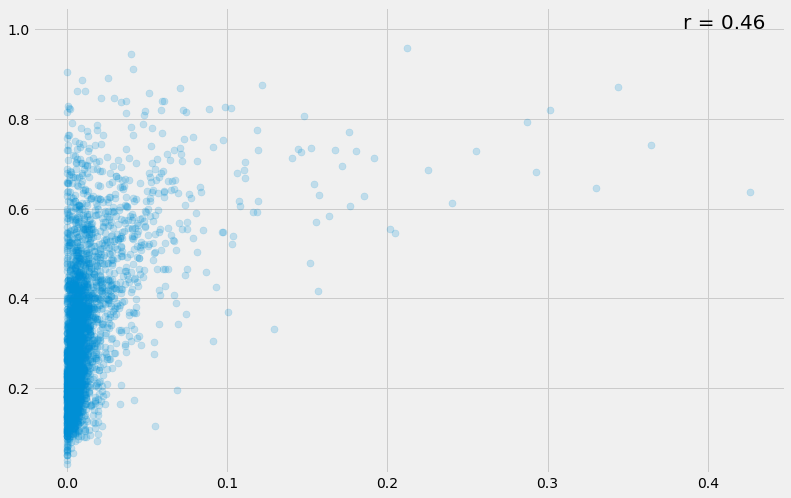

In [40]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

corr_r = aa_pres_2020_df.pct_asian_total.corr(aa_pres_2020_df.dem_twoway_pres)

plt.scatter(aa_pres_2020_df.pct_asian_total, aa_pres_2020_df.dem_twoway_pres, alpha=0.2, s=50)
# plt.xlim(0, 1.05)
plt.ylim(0.01, 1.05)
# ax.xaxis.set_major_formatter(lambda x, pos: str(int(x*100))+'%') 
# ax.yaxis.set_major_formatter(lambda x, pos: str(int(x*100))+'%') 
# plt.title(f'{election_year}', size=35)
# plt.ylabel('Dem. twoway voteshare for Senate')
# plt.xlabel('Dem. twoway voteshare for President')
# plt.annotate('\n\n Source: Algara (2021) \n', (0,0), (600, -20), 
#              xycoords='axes fraction', textcoords='offset points', va='top', alpha=0.7)
plt.annotate(f'r = {round(corr_r, 3)}', (0,0), (650, 460), 
             xycoords='axes fraction', textcoords='offset points', va='top', size=20)

---

#### Build Bokeh template

In [41]:
input_subg_dict = {
    'Asian - Total': 'pct_asian_total',
    'Asian - Other (specified)': 'pct_asian_other_specified',
    'Asian - Other (not specified)': 'pct_asian_other_not_specified',
    'Asian - Two or more races': 'pct_asian_two_more',
    'Bangladeshi': 'pct_asian_bangladeshi', 
    'Bhutanese': 'pct_asian_bhutanese',
    'Burmese': 'pct_asian_burmese', 
    'Cambodian': 'pct_asian_cambodian',
    'Chinese': 'pct_asian_chinese',
    'Filipino': 'pct_asian_filipino',
    'Hmong': 'pct_asian_hmong', 
    'Indian': 'pct_asian_indian',
    'Indonesian': 'pct_asian_indonesian',
    'Japanese': 'pct_asian_japanese',
    'Korean': 'pct_asian_korean',
    'Laotian': 'pct_asian_laotian',
    'Malaysian': 'pct_asian_malaysian',
    'Mongolian': 'pct_asian_mongolian',
    'Nepalese': 'pct_asian_nepalese',
    'Okinawan': 'pct_asian_okinawan',
    'Pakistani': 'pct_asian_pakistani', 
    'Sri Lankan': 'pct_asian_sri_lankan', 
    'Taiwanese': 'pct_asian_taiwanese',
    'Thai': 'pct_asian_thai', 
    'Vietnamese': 'pct_asian_vietnamese'
}


In [44]:
INPUT = 'Chinese'
aa_pres_2020_df = pd.read_csv('data/aa_pres_2020_df.csv')

data = aa_pres_2020_df[['state_name', 'state', 'county_name', 'dem_twoway_pres_display', 'dem_twoway_pres',
                   'pop_total', 'pct_asian_total', input_subg_dict[INPUT]]]
data

,state_name,state,county_name,dem_twoway_pres_display,dem_twoway_pres,pop_total,pct_asian_total,pct_asian_chinese
0,Alabama,AL,AUTAUGA,27.4%,0.274423,55380,0.010347,0.001571
1,Alabama,AL,BALDWIN,22.7%,0.227317,212830,0.009252,0.002847
2,Alabama,AL,BARBOUR,46.1%,0.461391,25361,0.005284,0.000000
3,Alabama,AL,BIBB,20.9%,0.208811,22493,0.001200,0.000000
4,Alabama,AL,BLOUNT,9.7%,0.096523,57681,0.003675,0.000988
...,...,...,...,...,...,...,...,...
3108,Wyoming,WY,SWEETWATER,23.8%,0.238163,43521,0.007812,0.001746
3109,Wyoming,WY,TETON,69.4%,0.694059,23280,0.012500,0.006057
3110,Wyoming,WY,UINTA,17.5%,0.175085,20479,0.001563,0.000000
3111,Wyoming,WY,WASHAKIE,16.7%,0.167094,8027,0.000000,0.000000


In [45]:
color_mapper = LinearColorMapper(palette=tuple(reversed(bokeh.palettes.RdBu11)), 
                                 low=0,
                                 high=1)

p = figure(title='',
           x_axis_label=f'% {INPUT}',
           y_axis_label='Dem. twoway voteshare',
           width=800,
           height=500)
rp = p.scatter(input_subg_dict[INPUT], 'dem_twoway_pres', source=data,
               line_color="black", 
               color={'field': 'dem_twoway_pres', 'transform': color_mapper},  
               fill_alpha=0.4, 
               size=10,
               legend_label='President'
              )
rs = p.scatter(input_subg_dict[INPUT], 'dem_twoway_sen', source=data,
               line_color="black", 
               color={'field': 'dem_twoway_sen', 'transform': color_mapper},  
               fill_alpha=0.4, 
               size=10,
               legend_label='Senate',
               visible=False
              )

p.add_tools(HoverTool(
    tooltips=[
        ('County', '@county_name'),
        ('State', '@state'),
        (f'% {INPUT}', f'@{input_subg_dict[INPUT]}'),
        ('Dem. Twoway for President', '@dem_twoway_pres_display'),
        ('Dem. Twoway for Senate', '@dem_twoway_sen_display')
    ]))

p.legend.click_policy="hide"
p.legend.location = "bottom_right"

# bokeh.plotting.output_file('index.html')
show(p)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "fill_color" value "dem_twoway_sen" (closest match: "dem_twoway_pres"), key "y" value "dem_twoway_sen" (closest match: "dem_twoway_pres") [renderer: GlyphRenderer(id=1056, glyph=Scatter(id='1054', ...), ...)]
